In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats
from scipy.stats import norm
import warnings
from sklearn.preprocessing import StandardScaler
import sklearn
import scipy.stats as st

In [2]:
train = pd.read_csv('train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
test = pd.read_csv('test.csv')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Parse dataset
Set a new dataset to process. So the train dataset still original

In [4]:
house_train = train

In [5]:
house_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

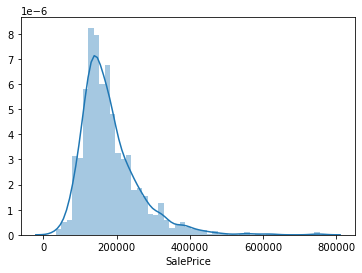

In [6]:
sb.distplot(house_train['SalePrice'])

In [7]:
print(house_train['SalePrice'].skew())
print(house_train['SalePrice'].kurt())

1.8828757597682129
6.536281860064529


In [8]:
house_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

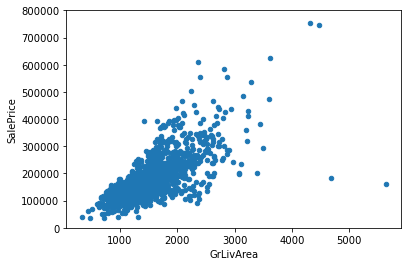

In [9]:
house_train.plot.scatter('GrLivArea',
                         'SalePrice', ylim = (0,800000))

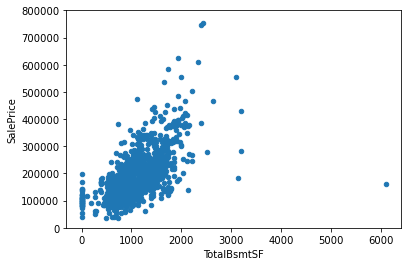

In [10]:
house_train.plot.scatter('TotalBsmtSF',
                         'SalePrice', ylim = (0,800000))

(-0.5, 9.5, 0.0, 800000.0)

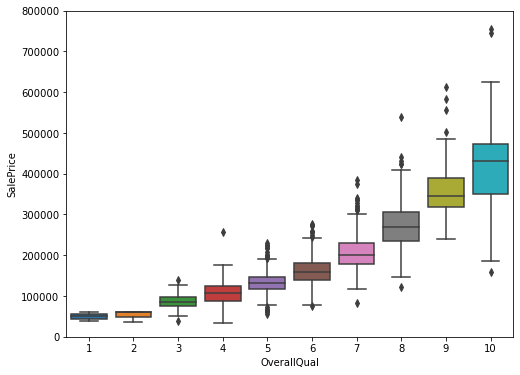

In [11]:
data = pd.concat([house_train['SalePrice'], house_train['OverallQual']], axis = 1)
fig, ax = plt.subplots(figsize = (8,6))
fig = sb.boxplot(x='OverallQual', y='SalePrice', data=data)
fig.axis(ymin = 0, ymax = 800000)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text major ticklabel objects>)

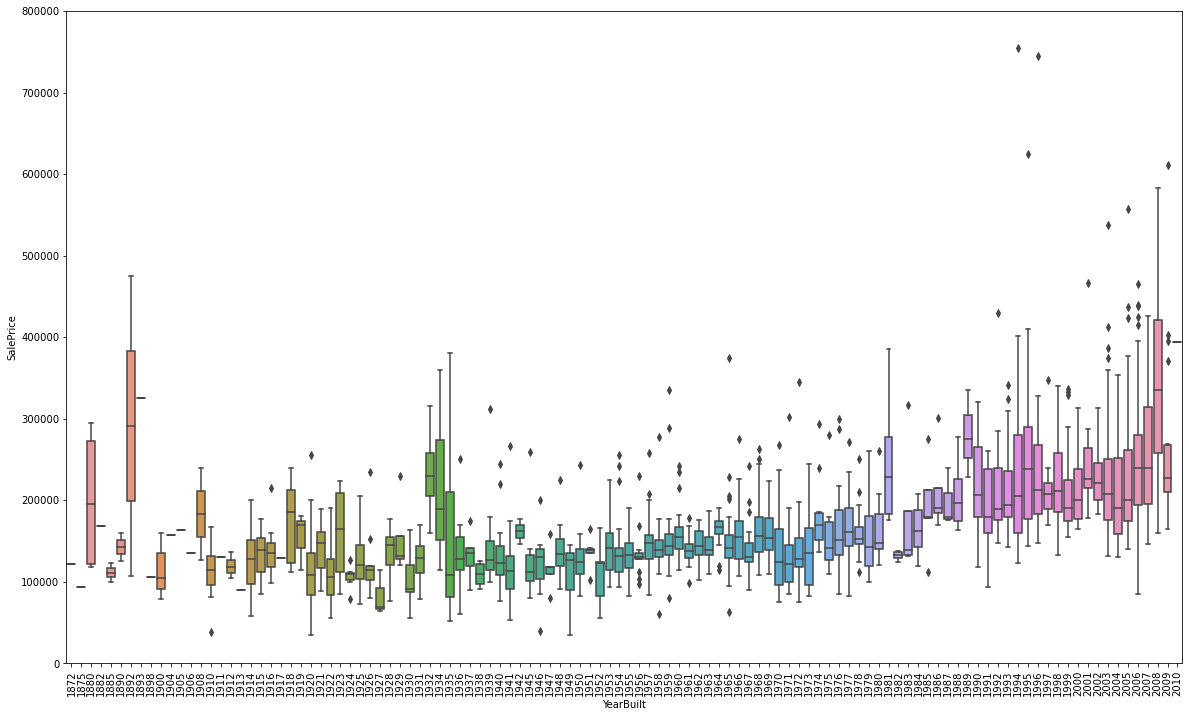

In [12]:
data = pd.concat([house_train['SalePrice'], house_train['YearBuilt']], axis = 1)
fig, ax = plt.subplots(figsize = (20,12))
fig = sb.boxplot(x='YearBuilt', y='SalePrice', data=data)
fig.axis(ymin = 0, ymax = 800000)
plt.xticks(rotation = 90)

### Correlation Map


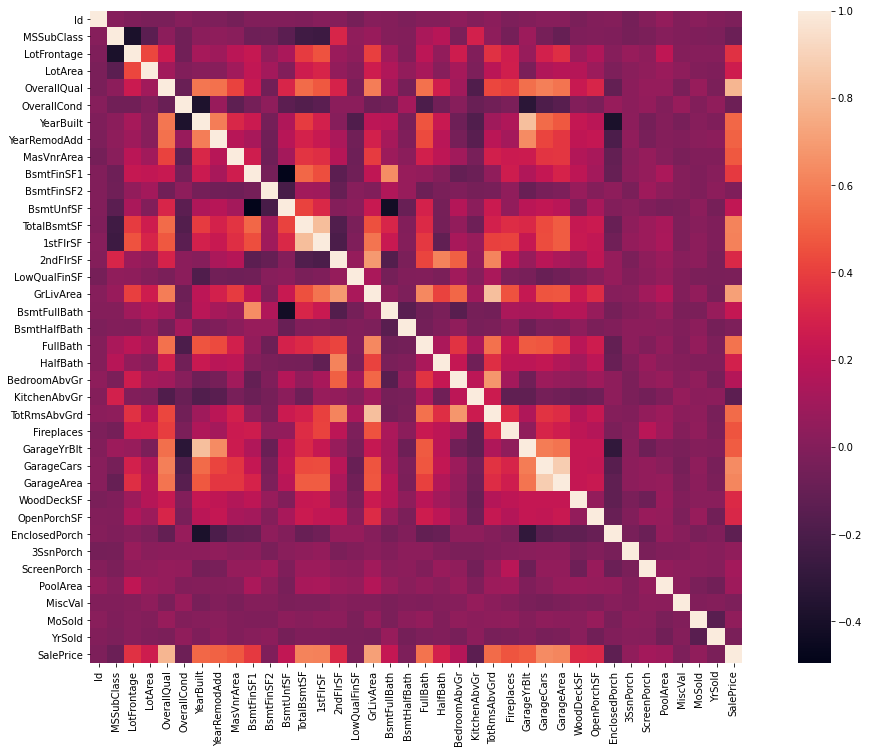

In [13]:
corrmap = house_train.corr()
fig, ax = plt.subplots(figsize = (20,12))
sb.heatmap(corrmap, square= True)

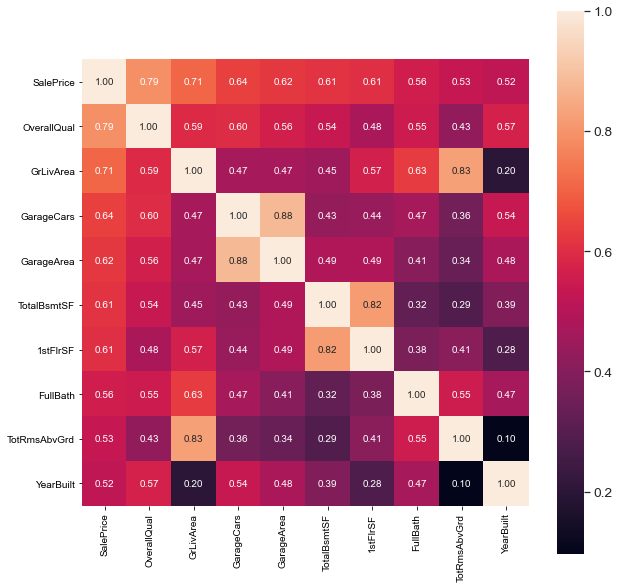

In [14]:
plt.subplots(figsize = (10,10))
k = 10
cols = corrmap.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(house_train[cols].values.T)
sb.set(font_scale=1.25)
hm = sb.heatmap(cm,
                cbar= True,
               annot=True,
               square=True,
               fmt='.2f',
               annot_kws={'size':10},
               yticklabels=cols.values,
               xticklabels=cols.values)


### Scatterplot distribution

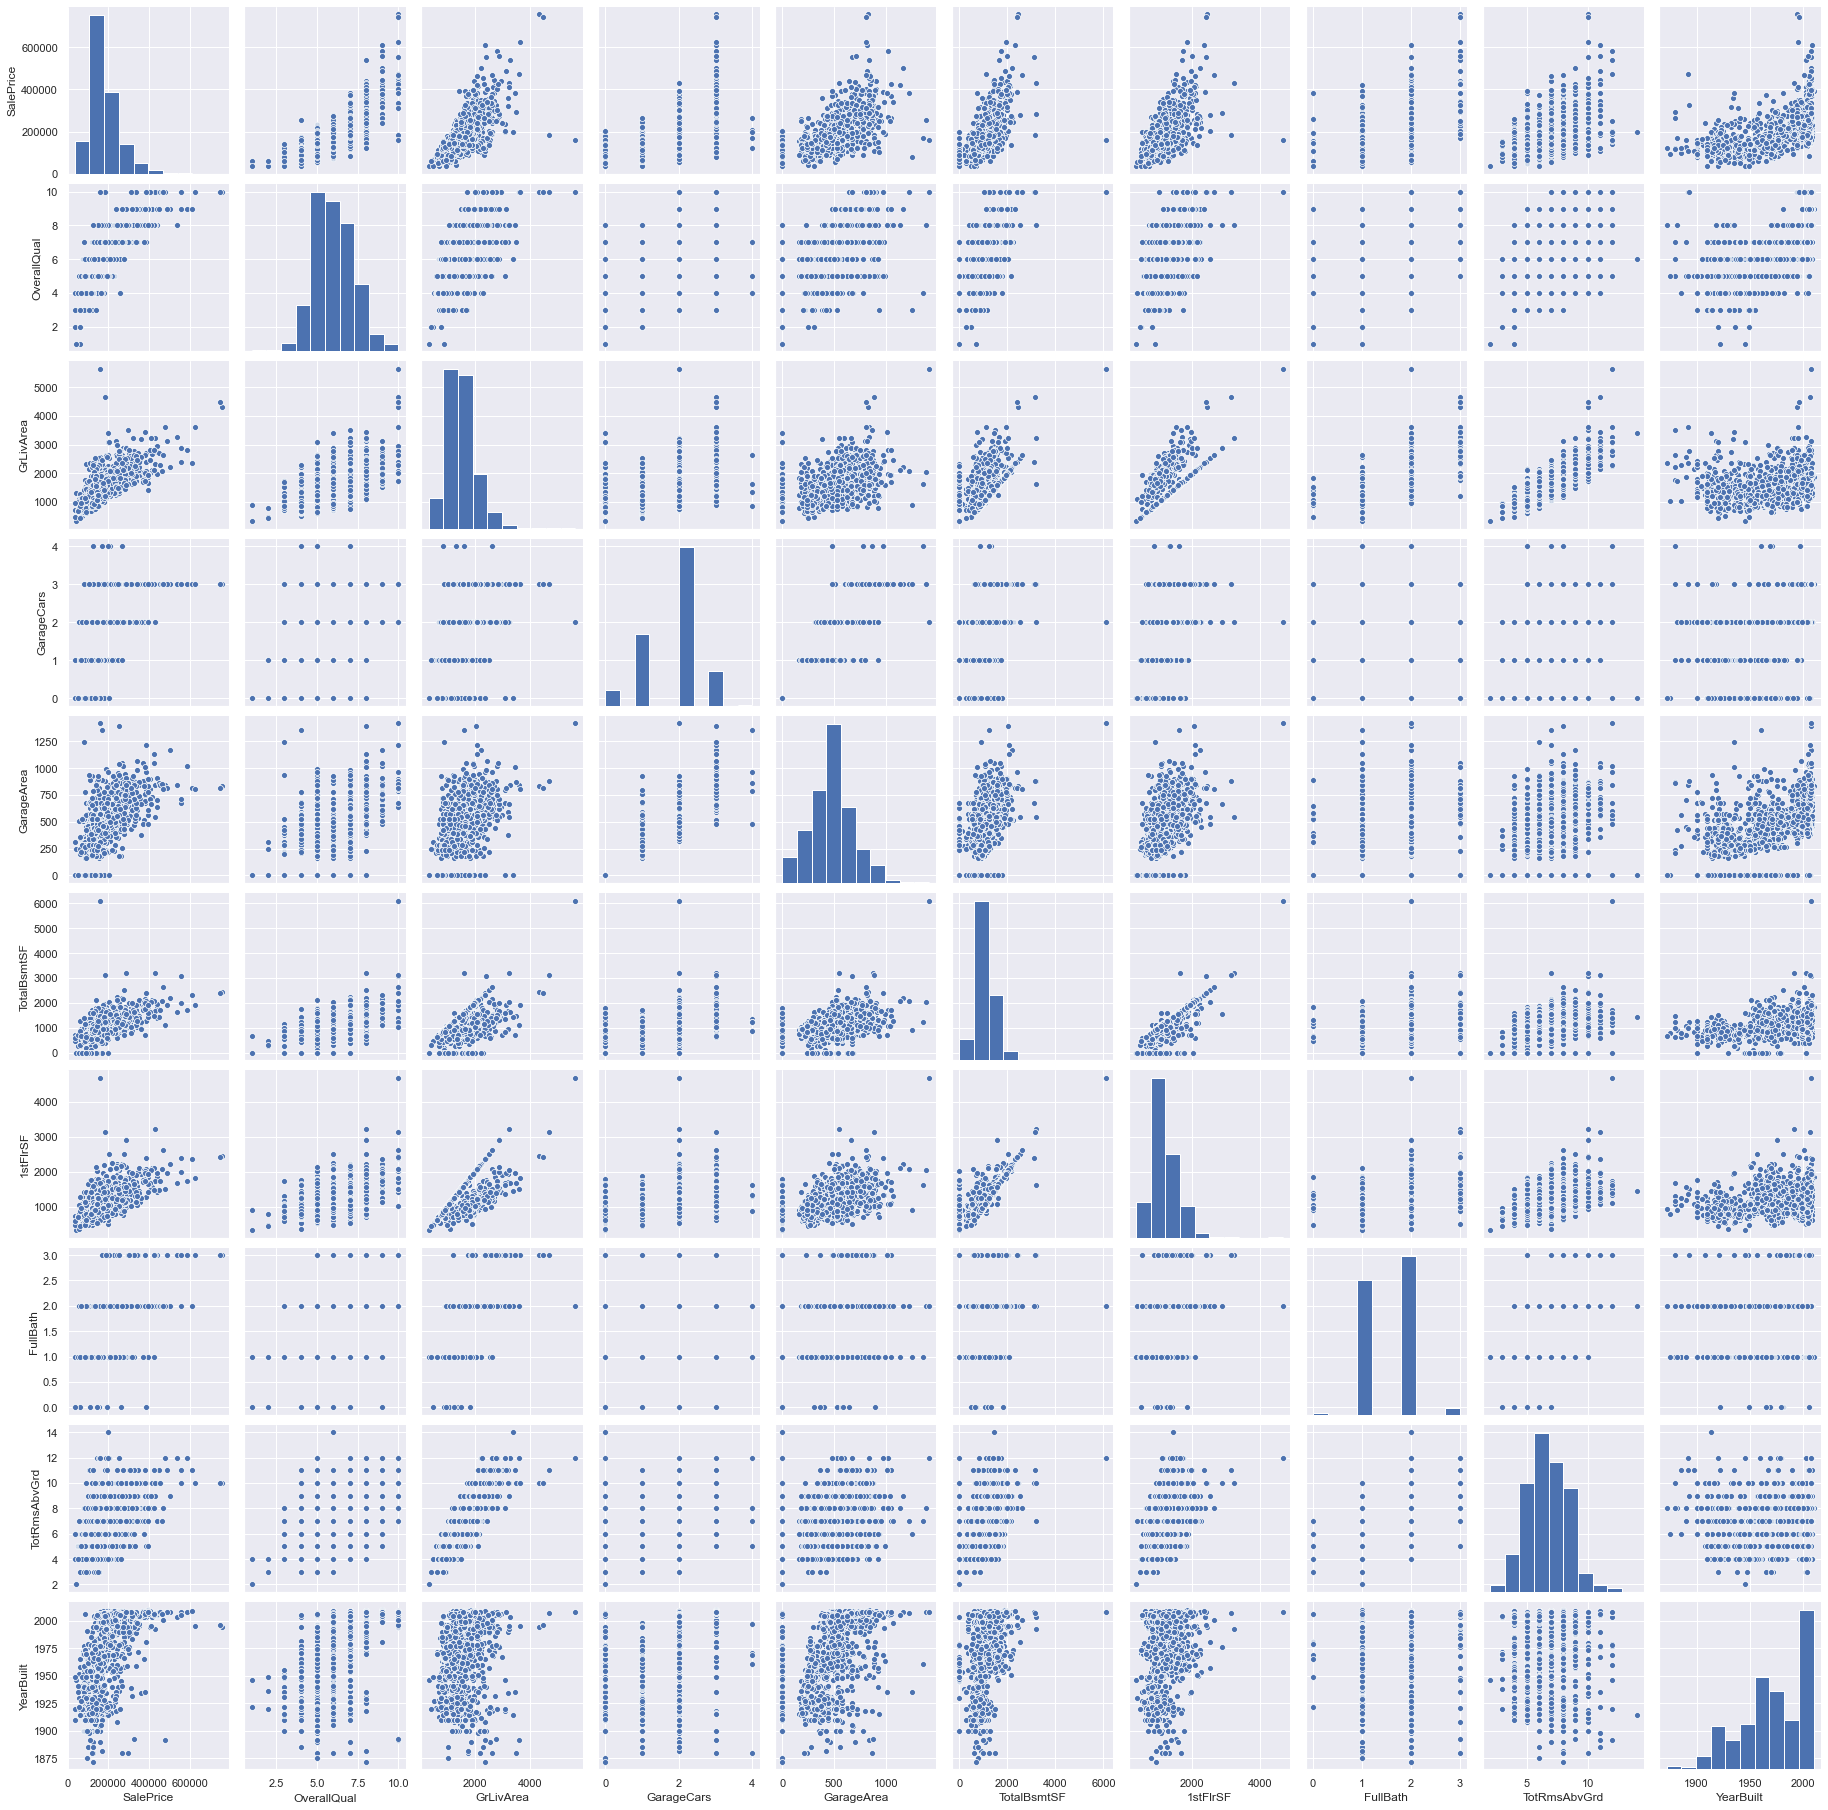

In [15]:
sb.set()
sb.pairplot(house_train[cols])

## Missing data

In [16]:
house_train.isnull().sum().sort_values(ascending= False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64

To ease intepret the data, missing data is presented in percentage


In [17]:
total_missing = house_train.isnull().sum().sort_values(ascending= False)
percent_missing = (house_train.isnull().sum() / house_train.isnull().count()).sort_values(ascending= False)

In [18]:
missing_data = pd.concat([total_missing,
                         percent_missing],
                        axis=1,
                        keys=['Total','Percent'])
missing_data.corr

<bound method DataFrame.corr of                Total   Percent
PoolQC          1453  0.995205
MiscFeature     1406  0.963014
Alley           1369  0.937671
Fence           1179  0.807534
FireplaceQu      690  0.472603
...              ...       ...
CentralAir         0  0.000000
SaleCondition      0  0.000000
Heating            0  0.000000
TotalBsmtSF        0  0.000000
Id                 0  0.000000

[81 rows x 2 columns]>

### Missing data on the most correlated vars

In [19]:
missing_data.loc[cols.values,:]

,Total,Percent
SalePrice,0,0.0
OverallQual,0,0.0
GrLivArea,0,0.0
GarageCars,0,0.0
GarageArea,0,0.0
TotalBsmtSF,0,0.0
1stFlrSF,0,0.0
FullBath,0,0.0
TotRmsAbvGrd,0,0.0
YearBuilt,0,0.0


### Check the correlation on the most missed data

In [20]:
missed_var = missing_data.index[missing_data['Percent'] >0.15]
missed_var

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
       'LotFrontage'],
      dtype='object')

In [21]:
missed_corr = pd.concat([house_train[missed_var],
                         house_train['SalePrice']], axis=1)
missed_corr

,PoolQC,MiscFeature,Alley,Fence,FireplaceQu,LotFrontage,SalePrice
0,NaN,NaN,NaN,NaN,NaN,65.0,208500
1,NaN,NaN,NaN,NaN,TA,80.0,181500
2,NaN,NaN,NaN,NaN,TA,68.0,223500
3,NaN,NaN,NaN,NaN,Gd,60.0,140000
4,NaN,NaN,NaN,NaN,TA,84.0,250000
...,...,...,...,...,...,...,...
1455,NaN,NaN,NaN,NaN,TA,62.0,175000
1456,NaN,NaN,NaN,MnPrv,TA,85.0,210000
1457,NaN,Shed,NaN,GdPrv,Gd,66.0,266500
1458,NaN,NaN,NaN,NaN,NaN,68.0,142125


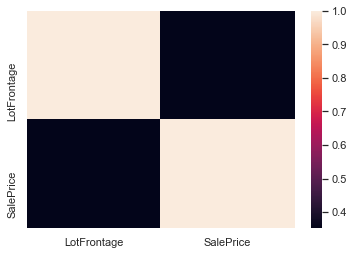

In [22]:
sb.heatmap(missed_corr.corr())

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 <a list of 19 Text major ticklabel objects>)

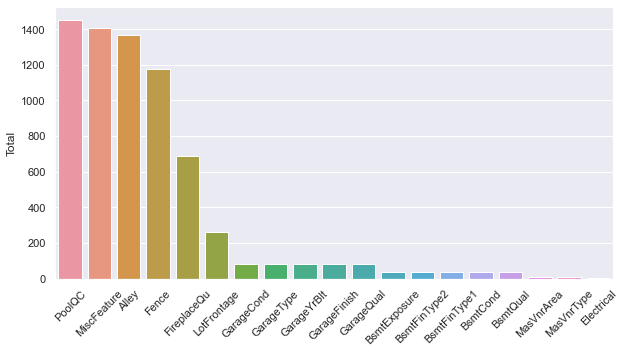

In [23]:
m = missing_data[missing_data['Total']>0]
fig, ax = plt.subplots(figsize=(10,5))
ref = sb.barplot(m.index, m['Total'])
plt.xticks(rotation = 45)

## Findings    
It is found that the previous data exploration only show the data type of Float and Integer. Things need to be done on the "object" type.

In [24]:
house_train.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [25]:
house_train.select_dtypes(include="object")

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


### Cut DataFrame
Columns with more than 15% missing value will be excluded.

In [26]:
excluded_row = missing_data[missing_data['Percent'] > 0.5].index
house_train_clean = house_train.drop(excluded_row, axis=1)
house_train_clean.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [27]:
df = pd.DataFrame(house_train_clean['GarageArea'])
df.isnull().any(axis=1)[:]

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Length: 1460, dtype: bool

### Outliers

Get the saleprice in a scaled datatype

In [28]:
house_train['SalePrice'][:,np.newaxis]

array([[208500],
       [181500],
       [223500],
       ...,
       [266500],
       [142125],
       [147500]], dtype=int64)

In [29]:
saleprice_scaled = StandardScaler().fit_transform(house_train['SalePrice'][:,np.newaxis])
saleprice_scaled.dtype

dtype('float64')

In [30]:
saleprice_scaled

array([[ 0.34727322],
       [ 0.00728832],
       [ 0.53615372],
       ...,
       [ 1.07761115],
       [-0.48852299],
       [-0.42084081]])

Compared if the data is directly pulled from dataset

In [31]:
house_train['SalePrice'].head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [32]:
house_train['SalePrice'].dtype

dtype('int64')

In [33]:
saleprice_scaled[:,0].argsort()

array([ 495,  916,  968, ..., 1169, 1182,  691], dtype=int32)

In [34]:
saleprice_range = saleprice_scaled[saleprice_scaled[:,0].argsort()]
saleprice_range

array([[-1.83870376],
       [-1.83352844],
       [-1.80092766],
       ...,
       [ 5.59185509],
       [ 7.10289909],
       [ 7.22881942]])

### Outer range of the distribution
#### Low

In [35]:
saleprice_range[:10]

array([[-1.83870376],
       [-1.83352844],
       [-1.80092766],
       [-1.78329881],
       [-1.77448439],
       [-1.62337999],
       [-1.61708398],
       [-1.58560389],
       [-1.58560389],
       [-1.5731    ]])

#### High

In [36]:
saleprice_range[-10:]

array([[3.82897043],
       [4.04098249],
       [4.49634819],
       [4.71041276],
       [4.73032076],
       [5.06214602],
       [5.42383959],
       [5.59185509],
       [7.10289909],
       [7.22881942]])

## Bivariate analysis

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


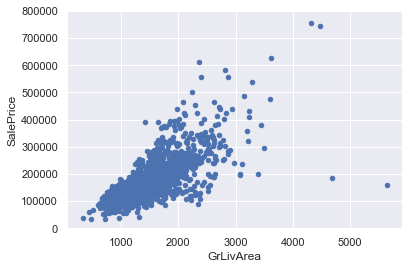

In [37]:
var = 'GrLivArea'
data = pd.concat([house_train['SalePrice'], house_train[var]], axis=1)
data.plot.scatter(x =var, y = 'SalePrice', ylim=(0,800000))

### Deleting columns

In [38]:
house_train.sort_values(by= 'GrLivArea', ascending= False)[:2]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [39]:
house_train.sort_values(by= 'GrLivArea', ascending= False)[:2].index

Int64Index([1298, 523], dtype='int64')

It is found that the outliers is Id 1299 (index 1298) and Id 524(index 523)

In [40]:
house_train.drop(house_train[house_train['Id'] == 1299].index)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


#### Drop method by using the Id information

In [41]:
house_train.drop(house_train[house_train['Id'] == 1299].index)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


#### Drop method by using the index value

In [42]:
house_train.drop(index=1298)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## Drop Outliers and Missing Data


### Drop outliers
Note that the deleted rows start from the bottom. It is move safe to use Id or in parameter information instead of using the index number. If using index, the deleted row will be filled by the next row. 

In [43]:
house_train = house_train.drop(house_train[house_train['Id'] == 1299].index)
house_train = house_train.drop(house_train[house_train['Id'] == 524].index)

### Drop missing value

In [44]:
missing_data[missing_data['Total'] > 0]

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


Missing data summary is show above. Missing data more than 5% will be dropped 

In [45]:
house_train = house_train.drop(house_train[missing_data[missing_data['Percent'] > 0.05].index], axis=1)

Missing data in 
- Electricity
- MasVnr
- Bsmt

will be dropped by row

In [46]:
drop_row_sum = missing_data.loc[((missing_data['Percent'] > 0) & (missing_data['Percent'] < 0.05))]
drop_row_var = drop_row_sum.index
drop_row_var

Index(['BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual',
       'MasVnrArea', 'MasVnrType', 'Electrical'],
      dtype='object')

In [47]:
for x in range(len(drop_row_var)):
    house_train = house_train.drop(house_train.loc[house_train[drop_row_var[x]].isnull()].index)

## Deep Exploration

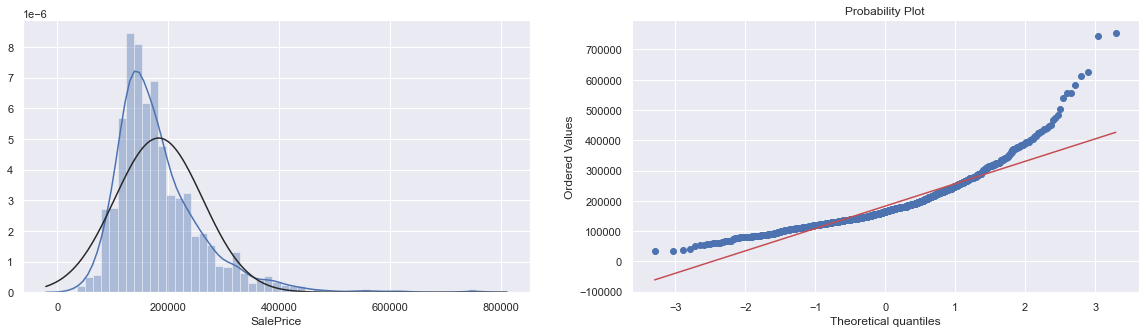

In [48]:
fig, ax = plt.subplots(1,2, figsize = (20,5))

sb.distplot(house_train['SalePrice'], fit=norm, ax= ax[0])
res = stats.probplot(house_train['SalePrice'], plot=plt)


Note:
- Positive skewness. It means log transformation has a high chance works well    

In [49]:
house_train['SalePriceLOG'] = np.log(house_train['SalePrice'])

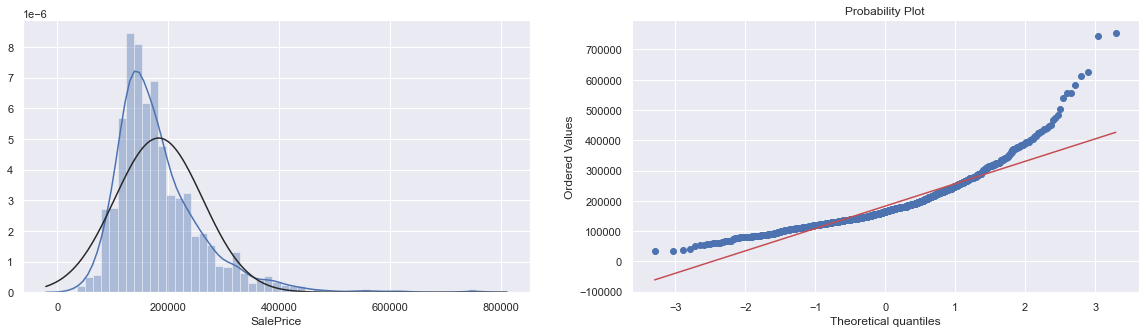

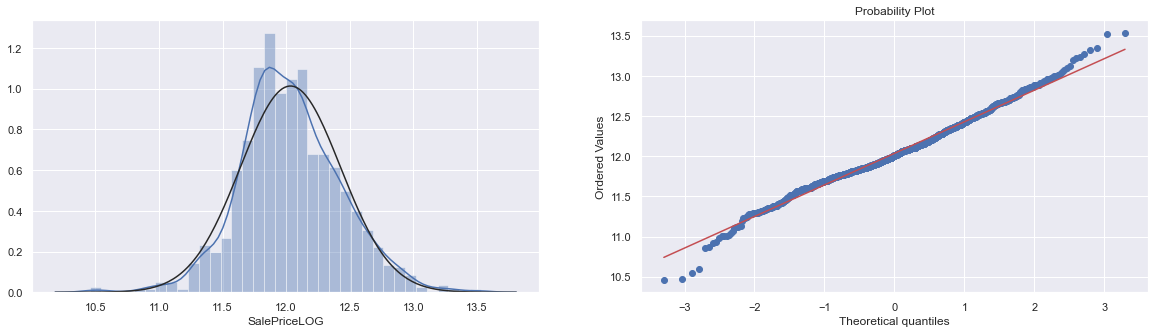

In [50]:
fig, ax = plt.subplots(1,2, figsize = (20,5))

sb.distplot(house_train['SalePrice'], fit=norm, ax = ax[0])
res = stats.probplot(house_train['SalePrice'], plot=plt)

fig, ax = plt.subplots(1,2, figsize = (20,5))

sb.distplot(house_train['SalePriceLOG'], fit=norm, ax = ax[0])
res = stats.probplot(house_train['SalePriceLOG'], plot=plt)

In [51]:
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

((array([-3.29536309, -3.03744781, -2.89397538, ...,  2.89397538,
          3.03744781,  3.29536309]),
  array([ 1,  2,  2, ..., 10, 10, 10], dtype=int64)),
 (1.3157279518266425, 6.133333333333334, 0.9723821829420572))

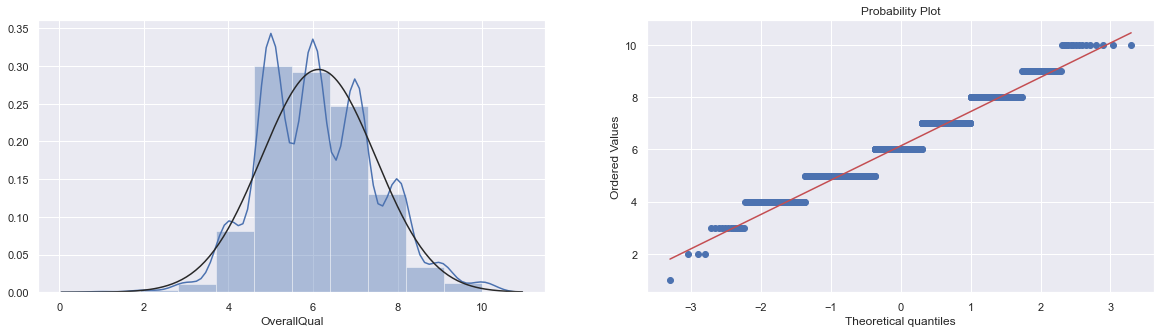

In [52]:
fig, ax = plt.subplots(1,2, figsize=(20,5))

sb.distplot(house_train['OverallQual'], fit = norm, ax = ax[0], bins=10)
stats.probplot(house_train['OverallQual'], plot=plt)

It means that a categorical or integer value is not appropriate to be managed by distplot and probplot

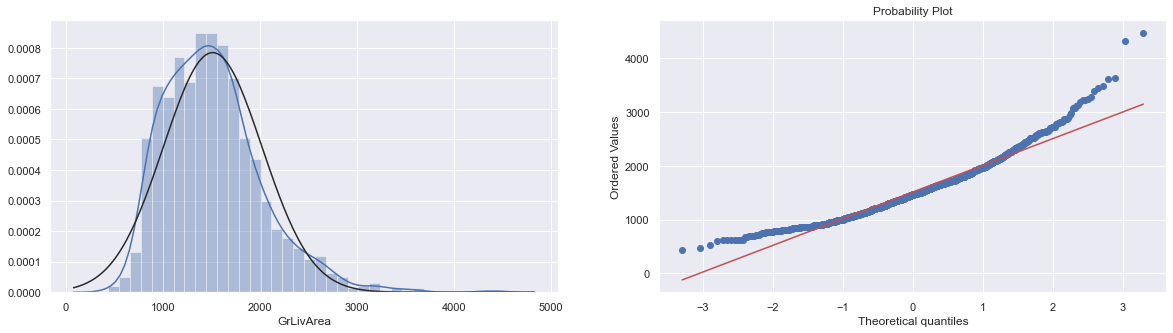

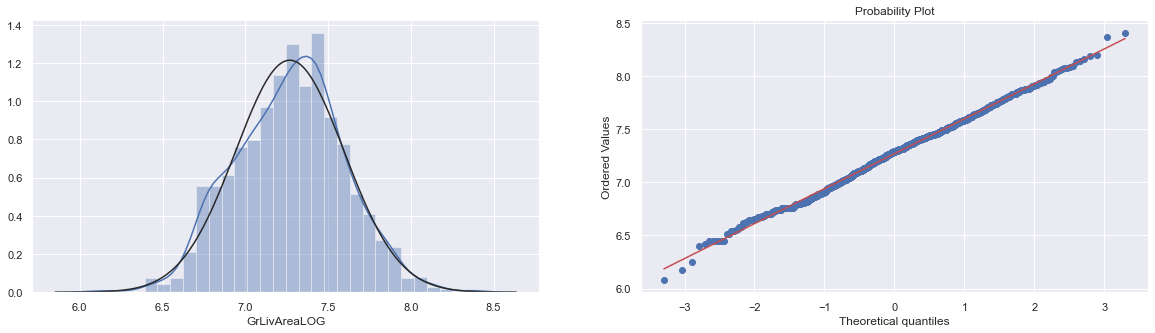

In [53]:
fig, ax = plt.subplots(1,2, figsize=(20,5))

sb.distplot(house_train['GrLivArea'], fit=norm, ax=ax[0])
res = stats.probplot(house_train['GrLivArea'], plot=plt)

house_train['GrLivAreaLOG'] = np.log(house_train['GrLivArea'])
fig, ax = plt.subplots(1,2, figsize=(20,5))

sb.distplot(house_train['GrLivAreaLOG'], fit=norm, ax=ax[0])
res = stats.probplot(house_train['GrLivAreaLOG'], plot=plt)


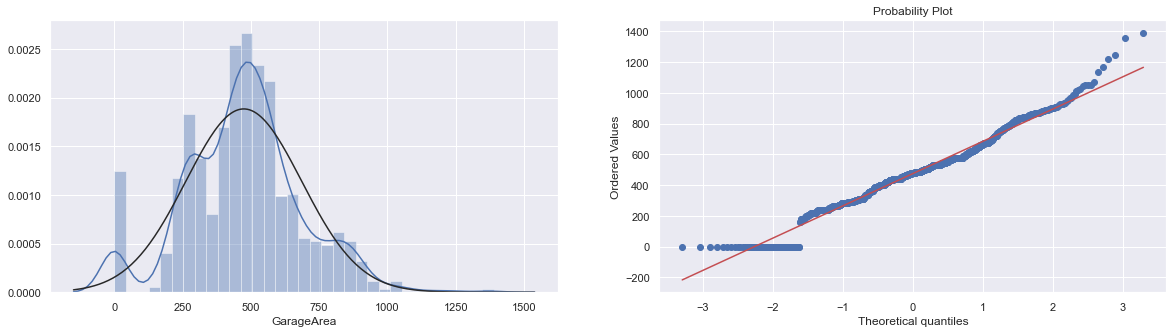

In [54]:
fig, ax = plt.subplots(1,2, figsize=(20,5))

sb.distplot(house_train['GarageArea'], fit=norm, ax=ax[0])
res = stats.probplot(house_train['GarageArea'], plot=plt)



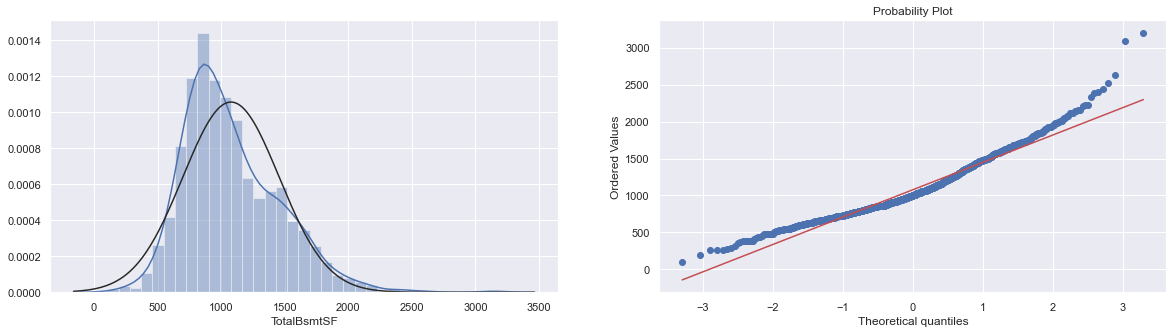

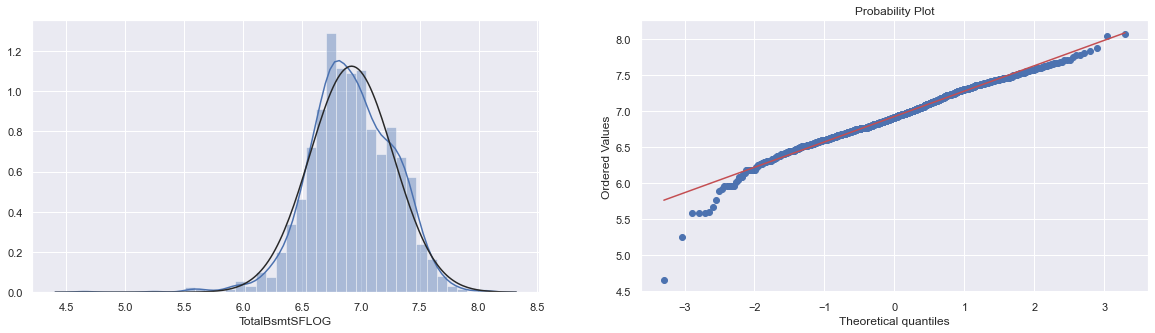

In [55]:
fig, ax = plt.subplots(1,2, figsize=(20,5))

sb.distplot(house_train['TotalBsmtSF'], fit=norm, ax=ax[0])
res = stats.probplot(house_train['TotalBsmtSF'], plot=plt)

house_train['TotalBsmtSFLOG'] = np.log(house_train['TotalBsmtSF'])

fig, ax = plt.subplots(1,2, figsize=(20,5))

sb.distplot(house_train['TotalBsmtSFLOG'], fit=norm, ax=ax[0])
res = stats.probplot(house_train['TotalBsmtSFLOG'], plot=plt)


## Cleaned Data


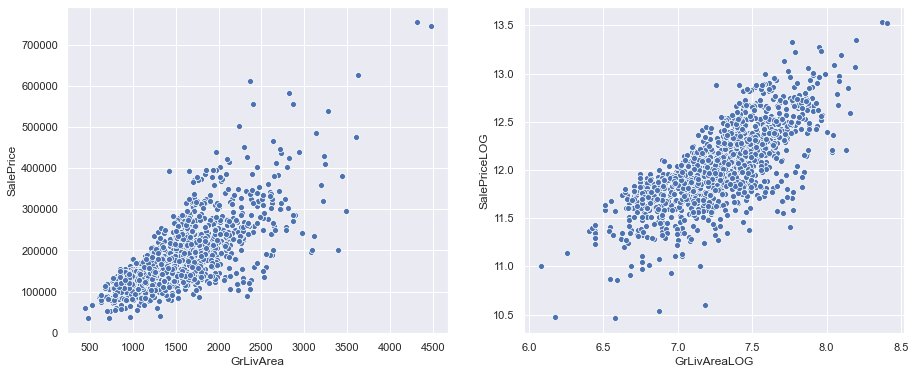

In [56]:
fig, ax = plt.subplots(1,2, figsize= (15,6))
sb.scatterplot(house_train['GrLivArea'], house_train['SalePrice'], ax = ax[0])
sb.scatterplot(house_train['GrLivAreaLOG'], house_train['SalePriceLOG'], ax = ax[1])

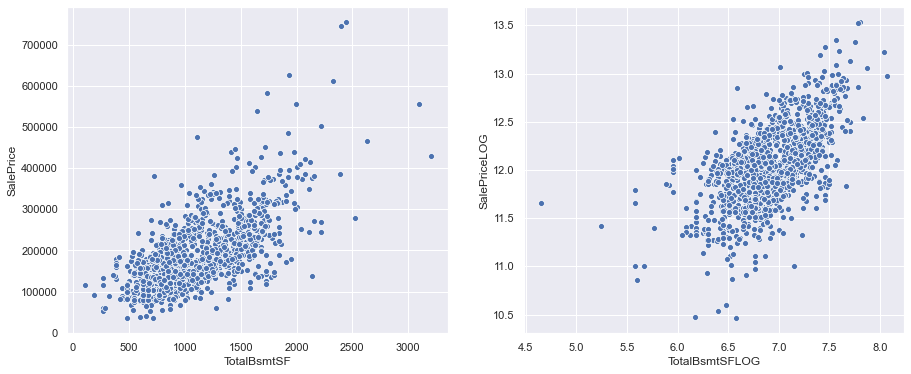

In [57]:
fig, ax = plt.subplots(1,2, figsize= (15,6))
sb.scatterplot(house_train['TotalBsmtSF'], house_train['SalePrice'], ax = ax[0])
sb.scatterplot(house_train['TotalBsmtSFLOG'], house_train['SalePriceLOG'], ax = ax[1])

## EDA to ML

In [58]:
quantitative = [f for f in house_train.columns if house_train.dtypes[f] != 'object']
quantitative.remove('SalePrice')
quantitative.remove('Id')

In [59]:
qualitative = [f for f in house_train.columns if house_train.dtypes[f] == 'object']

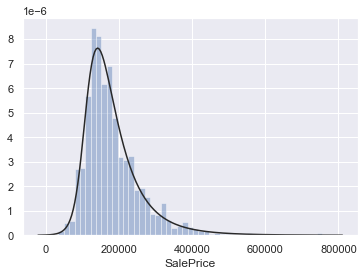

In [60]:
y = house_train['SalePrice']
sb.distplot(y, kde=False, fit=st.johnsonsu)

In [61]:
test_normality = lambda x: stats.shapiro(x.fillna(0))[1] < 0.01

In [62]:
normal = pd.DataFrame(house_train[quantitative])
normal

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePriceLOG,GrLivAreaLOG,TotalBsmtSFLOG
0,60,8450,7,5,2003,2003,196.0,706,0,150,...,0,0,0,0,0,2,2008,12.247694,7.444249,6.752270
1,20,9600,6,8,1976,1976,0.0,978,0,284,...,0,0,0,0,0,5,2007,12.109011,7.140453,7.140453
2,60,11250,7,5,2001,2002,162.0,486,0,434,...,0,0,0,0,0,9,2008,12.317167,7.487734,6.824374
3,70,9550,7,5,1915,1970,0.0,216,0,540,...,272,0,0,0,0,2,2006,11.849398,7.448334,6.628041
4,60,14260,8,5,2000,2000,350.0,655,0,490,...,0,0,0,0,0,12,2008,12.429216,7.695303,7.043160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,2000,0.0,0,0,953,...,0,0,0,0,0,8,2007,12.072541,7.406711,6.859615
1456,20,13175,6,6,1978,1988,119.0,790,163,589,...,0,0,0,0,0,2,2010,12.254863,7.636752,7.340836
1457,70,9042,7,9,1941,2006,0.0,275,0,877,...,0,0,0,0,2500,5,2010,12.493130,7.757906,7.049255
1458,20,9717,5,6,1950,1996,0.0,49,1029,0,...,112,0,0,0,0,4,2010,11.864462,6.982863,6.982863


In [63]:
test_normal = normal.apply(test_normality)
print(not test_normal.any())

False


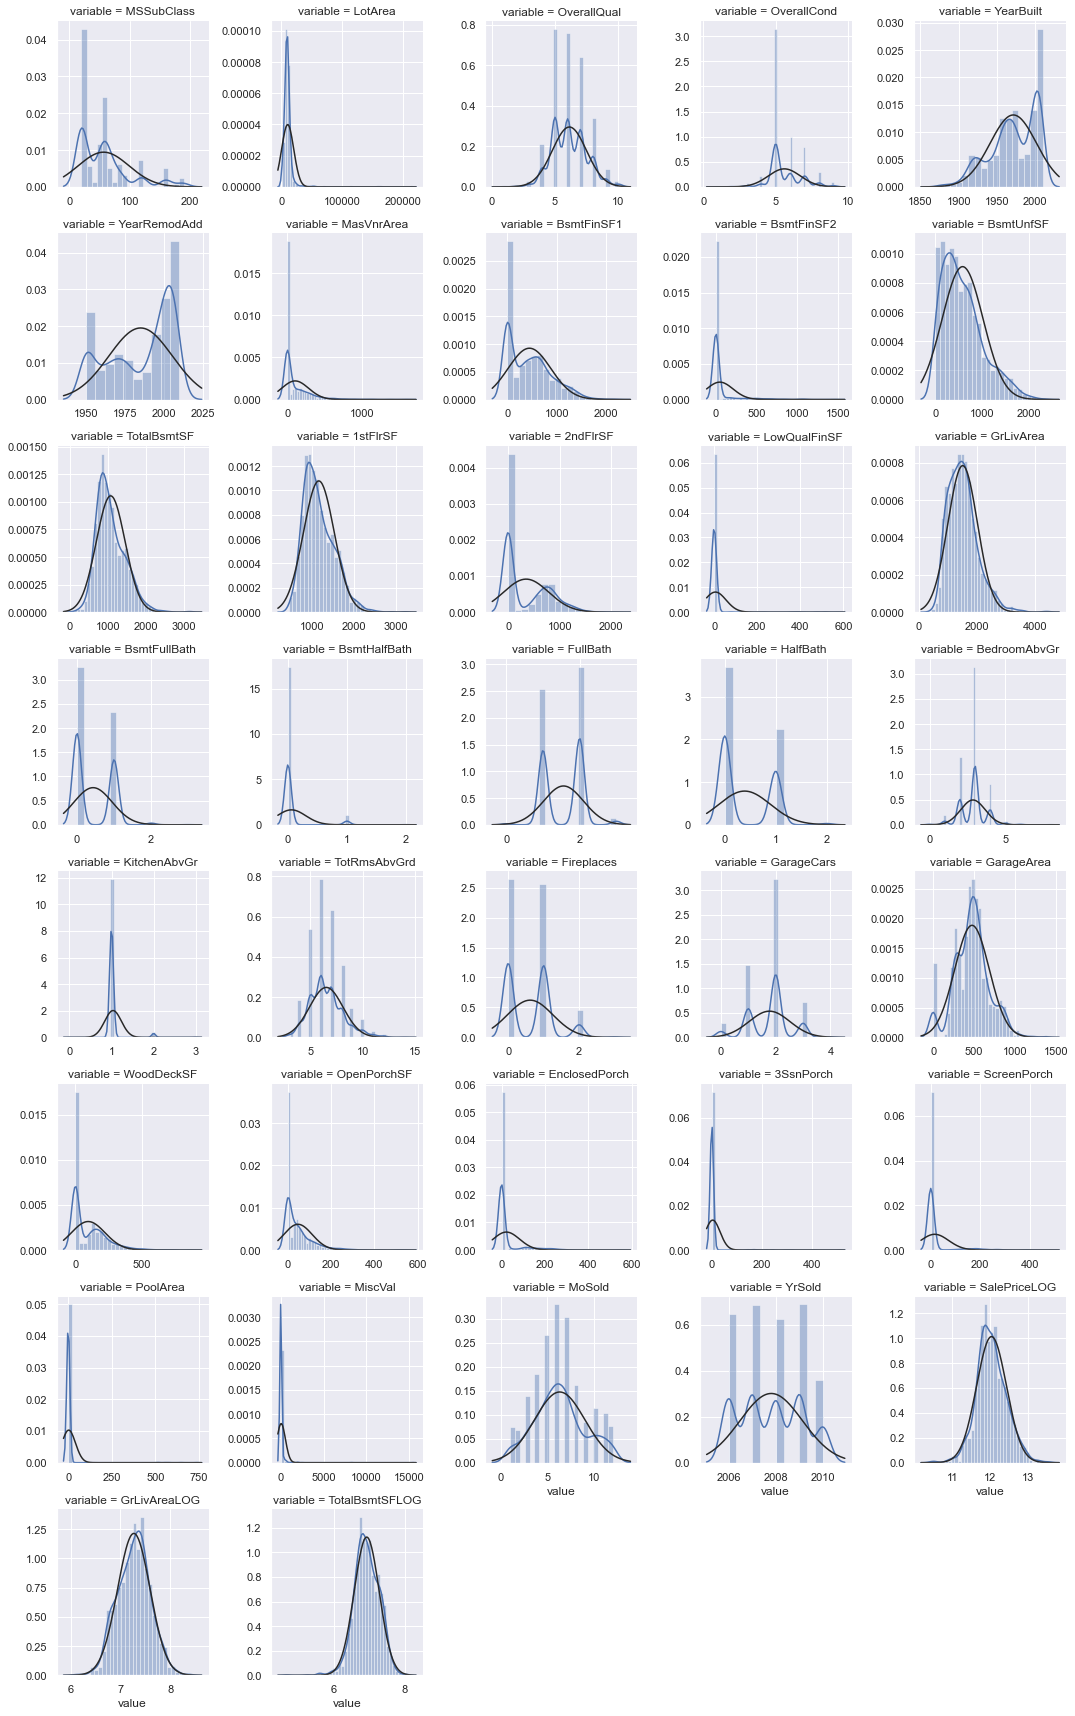

In [64]:
f = pd.melt(house_train, value_vars=quantitative)
g = sb.FacetGrid(f, col="variable",  col_wrap=5, sharex=False, sharey=False)
g = g.map(sb.distplot, "value", fit = norm)

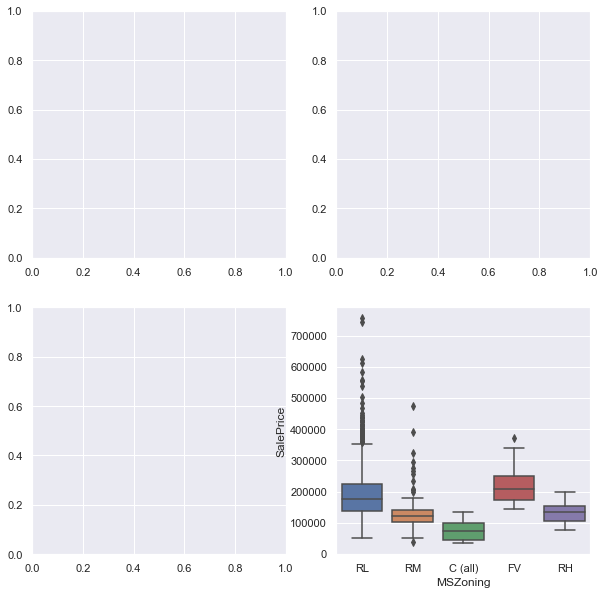

In [65]:
fig, ax = plt.subplots(2,2, figsize=(10,10))

ax[0,0] = sb.boxplot(data = house_train, y = 'SalePrice', x = 'MSZoning')

In [66]:
house_train.select_dtypes(include="object").columns
    

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')